# Livraison

## Importation

In [2]:
# LES ALGORITHMES
from QLearning import *
from DQN import *
from PPO import *
import time

# POUR AFFICHAGE
import matplotlib.pyplot as plt
import seaborn as sns
from helperPlot import *

# POUR ENVIRONNEMENT
import gymnasium
from gymnasium import spaces

## Environnement

In [55]:
class LivraisonEnv(gymnasium.Env) :
    def __init__(self, carte) :
        super(LivraisonEnv, self).__init__()
        self.size = len(carte)
        self.action_space = spaces.Discrete(4)
        self.observation_space = spaces.Discrete(self.size ** 2)
        self.map = carte
        self.state = 0
        self.hasBox = False

    def reset(self, seed = None, options = None) :
        super().reset(seed = seed)
        self.state = 0
        self.hasBox = False
        return self.state, {}

    def step(self, action) :
        x, y = self._stateToCoordinate(self.state)
        if action == 0 : # Left
            if x > 0 :
                x -= 1
        elif action == 1 : # Down
            if y < self.size -1 :
                y += 1
        elif action == 2 : # Right
            if x < self.size -1 :
                x += 1
        elif action == 3 : # Up
            if y > 0 :
                y -= 1
        
        self.state = self._coordinateToState(x, y)
        
        result = self.map[y][x]
        
        if result == 'B' :
            self.hasBox = True

        
        if result == 'G' and self.hasBox :
            reward = 1
            done = True
        elif result == 'H' :
            reward = -1
            done = True
        else :
            reward = -1/(self.size**2)
            done = False
        return self.state, reward, done, False, {}

    
    def _stateToCoordinate(self, state) :
        x = state % self.size
        y = state // self.size
        return x, y

    
    def _coordinateToState(self, x, y) :
        return self.size*y + x

    def render(self) :
        x, y = self._stateToCoordinate(self.state)
        toPrint = ''
        for i in range(self.size) :
            toPrintRow = ''
            row = self.map[i]
            for j in range(self.size) :
                if (j, i) == (x, y):
                    toPrintRow += '.'
                else :
                    toPrintRow += row[j]
            toPrint += toPrintRow + '\n'
        print(toPrint)
        if self.state == (self.size**2) - 1 :
            print("Objectif atteint")

In [28]:
def is_valid(board, max_size) :
    return is_box_reachable(board, max_size) and is_goal_reachable(board, max_size)

def is_box_reachable(board, max_size) :
    frontier, discovered = [], set()
    frontier.append((0, 0))
    while frontier:
        r, c = frontier.pop()
        if not (r, c) in discovered:
            discovered.add((r, c))
            directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
            for x, y in directions:
                r_new = r + x
                c_new = c + y
                if r_new < 0 or r_new >= max_size or c_new < 0 or c_new >= max_size:
                    continue
                if board[r_new][c_new] == "B":
                    return True
                if board[r_new][c_new] != "H":
                    frontier.append((r_new, c_new))
    return False
    
def is_goal_reachable(board, max_size):
    frontier, discovered = [], set()
    frontier.append((0, 0))
    while frontier:
        r, c = frontier.pop()
        if not (r, c) in discovered:
            discovered.add((r, c))
            directions = [(1, 0), (0, 1), (-1, 0), (0, -1)]
            for x, y in directions:
                r_new = r + x
                c_new = c + y
                if r_new < 0 or r_new >= max_size or c_new < 0 or c_new >= max_size:
                    continue
                if board[r_new][c_new] == "G":
                    return True
                if board[r_new][c_new] != "H":
                    frontier.append((r_new, c_new))
    return False


def generate_random_map(size = 8, p = 0.8) :
    valid = False
    board = []

    while not valid:
        p = min(1, p)
        board = np.random.choice(["F", "H"], (size, size), p=[p, 1 - p])
        x = np.random.randint(0, size)
        y = np.random.randint(0, size)
        while (x, y) == (0, 0) or (x, y) == (size-1, size-1) :
            x = np.random.randint(0, size)
            y = np.random.randint(0, size)
        board[x][y] = "B"
        board[0][0] = "S"
        board[-1][-1] = "G"
        valid = is_valid(board, size)
    return ["".join(x) for x in board]

## Optimisation DQN

.FFH
BFFF
FFFF
FFFG



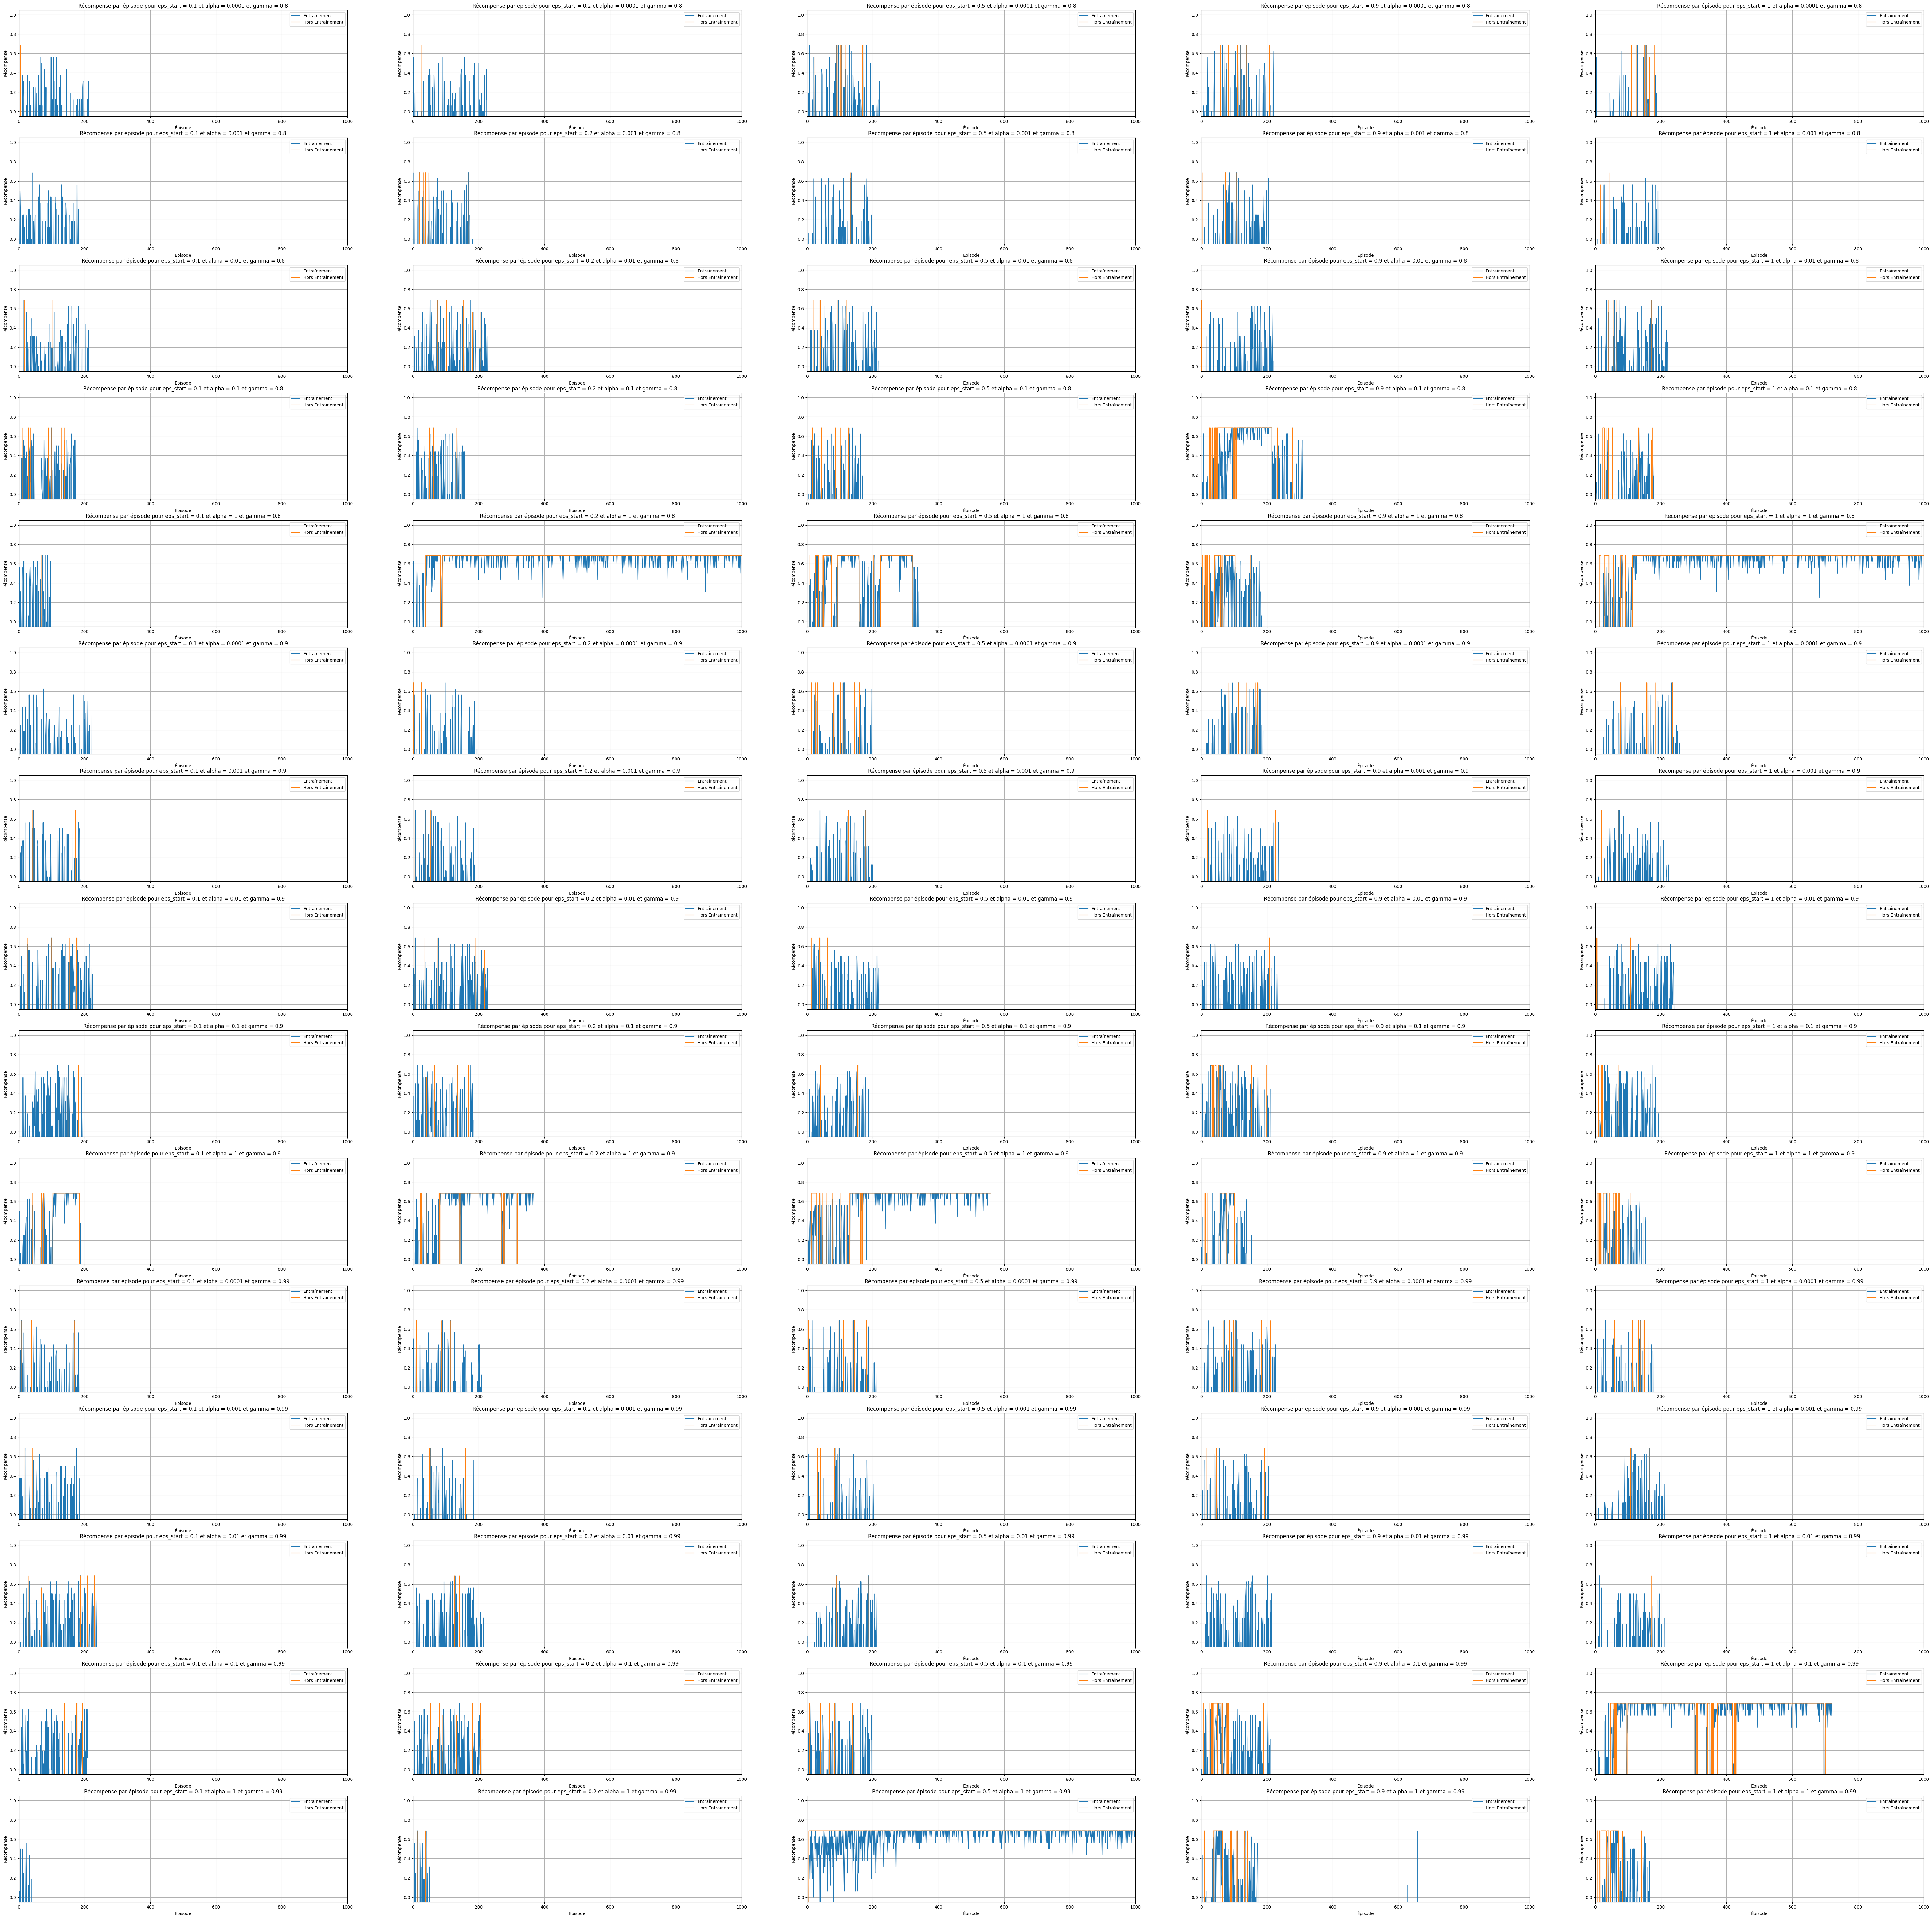

In [68]:
predefined = []

lr_poss = [0.0001, 0.001, 0.01, 0.1, 1]
gamma_poss = [0.8, 0.9, 0.99]
eps_poss = [0.1, 0.2, 0.5, 0.9, 1]

timesteps = 10000
savePath = "Livraison_QLearning_4.png"

size = 4

env = LivraisonEnv(generate_random_map(size))
env.render()

plot_q_learning_performance_forAll3(savePath, env, timesteps, (1000, -0.05, 1.05), 
                                    predefined,
                                    "eps_start", eps_poss, 
                                    "alpha", lr_poss,
                                    "gamma", gamma_poss)

On prend un gamme de 0.99

In [ ]:
predefined = [('gamma', 0.99)]

lr_poss = [0.0001, 0.001, 0.01, 0.1, 1]
gamma_poss = [0.8, 0.9, 0.99]
eps_poss = [0.1, 0.2, 0.5, 0.9, 1]

timesteps = 10000
savePath = "Livraison_QLearning_4.png"

size = 4

env = LivraisonEnv(generate_random_map(size))
env.render()

plot_q_learning_performance_forAll3(savePath, env, timesteps, (1000, -0.05, 1.05), 
                                    predefined,
                                    "eps_start", eps_poss, 
                                    "alpha", lr_poss,
                                    "gamma", gamma_poss)